<a href="https://colab.research.google.com/github/rhiga2/AIHawaii/blob/main/papers/deeplearning/ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision
import torch
import torchvision
import torchvision.transforms as transforms

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
# prompt: import the cirfar10 library, split into train, validation, and test set

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


100%|██████████| 170498071/170498071 [00:12<00:00, 13115297.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


In [40]:
# prompt: Create a dataloader for trainset, valset, and testset

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=1000, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


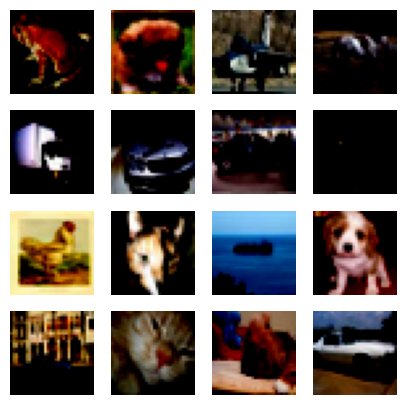

In [4]:
# prompt: Display a 4x4 grid of cifar10 images from the trainset

import matplotlib.pyplot as plt

# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
plt.figure(figsize=(5, 5))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4+j+1)
        plt.imshow(images[i*4+j].permute(1, 2, 0))
        plt.axis('off')
plt.show()


In [24]:
# prompt: Create a pytorch module representing AlexNet

import torch.nn as nn
import torch.nn.functional as F

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding,
                 pool_kernel_size=None, pool_stride=None):
        super(ConvBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels,
                          kernel_size, stride, padding)
        self.relu = nn.ReLU()
        self.maxpool = None
        if pool_kernel_size is not None:
            self.maxpool = \
            nn.MaxPool2d(kernel_size=pool_kernel_size, stride=pool_stride)

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        if self.maxpool is not None:
            x = self.maxpool(x)
        return x

class LinearBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearBlock, self).__init__()
        self.fc = nn.Linear(in_features, out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        return x

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv_blocks = nn.Sequential(
            ConvBlock(3, 6, kernel_size=5, stride=1, padding=0,
                      pool_kernel_size=2, pool_stride=2),
            ConvBlock(6, 16, kernel_size=5, stride=1, padding=0,
                      pool_kernel_size=2, pool_stride=2),
        )
        self.flatten_size = 16 * 5 * 5
        self.linear_blocks = nn.Sequential(
            LinearBlock(self.flatten_size, 120),
            nn.Dropout(0.5),
            LinearBlock(120, 84),
            nn.Dropout(0.5),
            LinearBlock(84, 10),
        )

    def forward(self, x):
        x = self.conv_blocks(x)
        x = x.view(-1, self.flatten_size)
        x = self.linear_blocks(x)
        return x

lenet = LeNet()
print(lenet)


LeNet(
  (conv_blocks): Sequential(
    (0): ConvBlock(
      (conv): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): ConvBlock(
      (conv): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (linear_blocks): Sequential(
    (0): LinearBlock(
      (fc): Linear(in_features=400, out_features=120, bias=True)
      (relu): ReLU()
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): LinearBlock(
      (fc): Linear(in_features=120, out_features=84, bias=True)
      (relu): ReLU()
    )
    (3): Dropout(p=0.5, inplace=False)
    (4): LinearBlock(
      (fc): Linear(in_features=84, out_features=10, bias=True)
      (relu): ReLU()
    )
  )
)


In [38]:
# prompt: Write a training loop on gpu using stochastic gradient descent and show progress bar

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
lenet = LeNet()
lenet = lenet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.001, momentum=0.90)

output_frequency = 100

from tqdm import tqdm

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    pbar = tqdm(trainloader, desc=f"Epoch {epoch+1}/{10}")
    for i, data in enumerate(pbar):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = lenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % output_frequency == output_frequency - 1:
            pbar.set_description(f"Epoch {epoch+1}/{10} " + \
                                 f"loss: {running_loss / output_frequency:.3f}")
            running_loss = 0.0


Epoch 10/10 loss: 1.245: 100%|██████████| 782/782 [00:14<00:00, 53.84it/s]


In [39]:
# prompt: validate model on validation set, give accuracy on validation set

correct = 0
total = 0
with torch.no_grad():
    for data in valloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = lenet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model : %d %%' % (100 * correct / total))


Accuracy of the model : 54 %


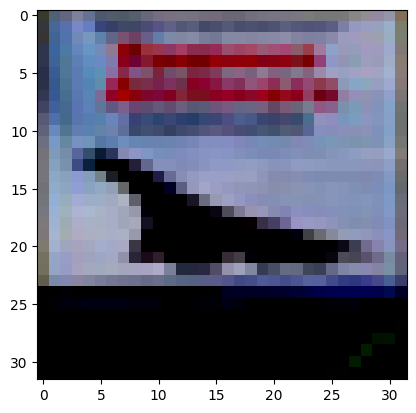

Predicted class: plane


In [46]:
# prompt: Write code that picks out an image in test set, displays it, and classifies it

import matplotlib.pyplot as plt

dataiter = iter(testloader)
images, labels = next(dataiter)

# Pick a random image
index = 3
image = images[index]

# Show the image
plt.imshow(image.permute(1, 2, 0))
plt.show()

# Classify the image
output = lenet(image.unsqueeze(0).to(device))
_, predicted = torch.max(output, 1)

# Print the predicted class
print("Predicted class:", classes[predicted.item()])
